# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep:46     |  |
| :-------------|:-------------|
| Zahra Ramdane | 6533183|
| Hidde Van Den Bergh| 6576079 |
| Emma Van Der Grinten | 6404618 |

| Planning Groep: XX     |Tijdstip / Tijdspanne  |
| Sanity Check: 15m
| Toepassingen bedenken + criteria: 12:30
| Kaliberatie opstelling maken: 14
| Mijlpaal 2: Eerste kalibratie meting gedaan: 14.15
| Aanpassingen om geschikt te maken: 15h
| Pauze 2: 15.15
| Aanpassingen om geschikt te maken: 16h
| Inleveren: 16.30h

## *Opdracht 1*: Foto van alle schetsen.


![Alt](Hidde.jpeg "analyse: ideeen")
![Alt](emma.jpeg "analyse: ideeen")
![Alt](Zahradruksensor.jpeg "analyse: ideeen")




## Opdracht 2 – Mijlpaal – Leerdoel

| **Sensor + Toepassing**                    | **Criterium**        | **Eis**                                                                 |
|-------------------------------|-----------------------|-------------------------------------------------------------------------|
| **Thermistor – Brandmelder** | Bereik               | 50 °C – 100 °C                                                          |
|                               | Nauwkeurigheid        | ±0.5 °C                                                                 |
|                               | Meetfrequentie        | Minimaal elke 2 seconden een update                                    |
|                               | Resolutie             | Kan temperatuurveranderingen van 0.5 °C onderscheiden                  |
| **Hall-sensor – ABS Systeem** | Frequentiebereik      | Kan magnetisch veld meten bij rotaties tot 840 RPM                     |
|                               | Resolutie             | 0.005 T                                                                 |
|                               | Detectiecriterium     | Bij 14 constante rotaties binnen ±0.005 T → waarschuwing binnen 0.1 s  |
| **Druksensor – Toetsenbord**  | Bereik               | 0.7 N – 1.15 N N                                                           |
|                               | Nauwkeurigheid        | ±0.05 N                                                                 |
|                               | Resolutie             | Kan krachtveranderingen van 0.5 N onderscheiden                        |
|                               | Lineariteit           | Sensoruitgang moet binnen het krachtbereik een lineaire relatie vertonen tussen kracht (N) en bits |

Groep 46 heeft gekozen voor druksensor toepassing


## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.

Op de foto is het elektrisch circuit met bijbehorende onderdeel waarmee we kracht gaan varieren getekent. Bij de eerste opstelling drukken we handmatig op een krachtmeter (veer), terwijl een vinger op de druksensor zit. Op deze manier proberen we de kracht te meten die op de sensor werkt.

 ![Alt](Ontwerp.jpeg "analyse: ideeen")
 

## *Opdracht 4*: Beantwoord de vragen

## 1. Variabele die wordt veranderd
We variëren de kracht die op de druksensor wordt uitgeoefend.  
Dit doen we door verschillende massa’s op de sensor te plaatsen.  
De kracht wordt berekend met:

F = m * g

waarbij g = 9.81 m/s**2

## 2. Bereik van de variabele
De kracht wordt gevarieerd van 0.70 N tot 1.15 N, overeenkomend met massa’s van ongeveer 70 g tot 115 g.

## 3. Wat wordt er gemeten?
Per meetpunt registreren we:

- Massa (kg)  
- Kracht (N), berekend via F = m*g  
- Uitgangswaarde van de druksensor (bits)  

## 4. Aantal metingen
We verhogen de kracht in stappen van 0.5 N binnen het gevraagde bereik, maar meten ook daarbuiten om te controleren of de sensor lineair blijft en niet verzadigt.

## 5. Evaluatie van geschiktheid
Met deze meetopzet kunnen we bepalen:

- of de sensor binnen het bereik reageert en variatie van waardes geeft binnen de gekozen stapgrootte  
- of de sensor lineair reageert binnen het krachtbereik  
- of de nauwkeurigheid voldoende is  

Hiermee kunnen we beoordelen of de sensor geschikt is voor het toetstenbord. 
 

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.

Op de foto is de fabricering van het elektrisch circuit aangesloten op de Arduino te zien.

![Alt](Circuitopbreadboard.jpeg "analyse: ideeen")

Op de foto's hieronder zijn twee verschillende meetopstellingen te zien.

In de eerste opstelling werd met de hand op een (veer)krachtmeter gedrukt terwijl een vinger op de druksensor rustte. De kracht die op de sensor werd uitgeoefend, werd zo afgelezen op de krachtmeter, terwijl de Arduino gelijktijdig de bits‑waarde registreerde

![Alt](krachtmeter.jpeg )



In de tweede opstelling werd een klein pootje op de druksensor geplaatst met daarop een leeg bekertje. Door het bekertje telkens met nauwkeurig afgewogen hoeveelheden water te vullen, werd de kracht op de sensor gecontroleerd en stap voor stap verhoogd binnen het gewenste bereik.

![Alt](wateropstelling.jpeg)

## *Opdracht 6*: Meten en fitten, Leerdoel

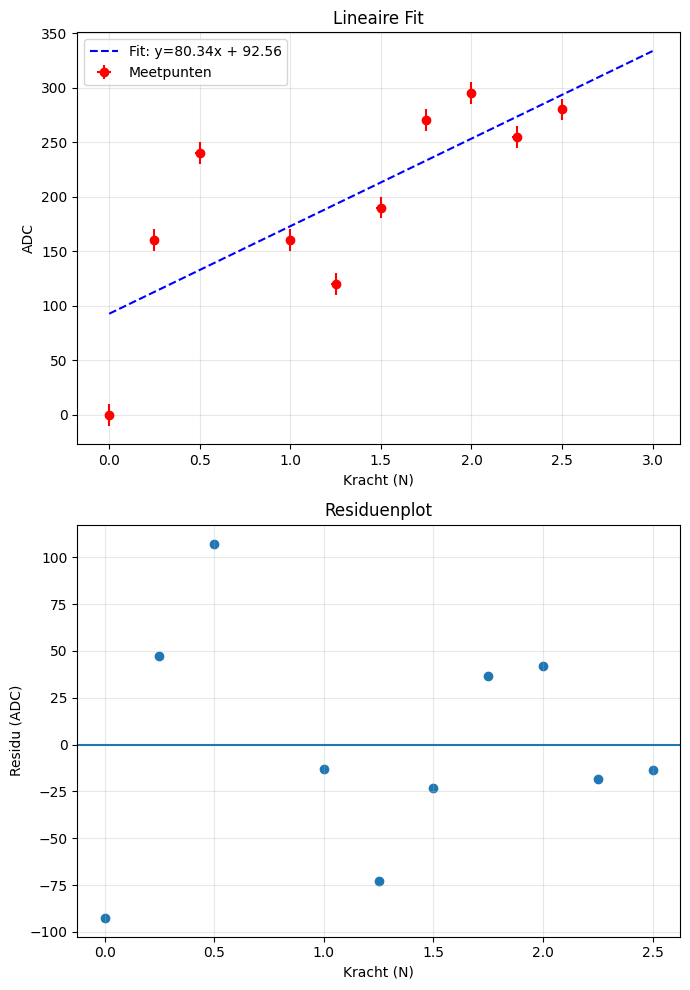

In [1]:
#Eerste opstelling van de code voor kalibreren en residuenplot: 

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1. Data invoeren
kracht_data = np.array([0, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) 
bits_data = np.array([0, 160, 240, 160, 120, 190, 270, 295, 255, 280]) 

bits_error = np.zeros(len(bits_data)) + 10
kracht_error = np.zeros(len(kracht_data)) + 0.025

# 2. Lineair model
def lineair_model(x, a, b):
    return a * x + b

# 3. Curve fit uitvoeren
popt, _ = curve_fit(lineair_model, kracht_data, bits_data)
a_fit, b_fit = popt

# 4. Voorspellingen en residuen
voorspeld = lineair_model(kracht_data, *popt)
residuen = bits_data - voorspeld

# 5. Plot maken
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))

# Bovenste grafiek: data + fit
ax1.errorbar(kracht_data, bits_data, xerr=kracht_error, yerr=bits_error, fmt = 'o', color='red', label='Meetpunten')
x_range = np.linspace(0, 3, 100)
ax1.plot(x_range, lineair_model(x_range, *popt), 'b--',label=f'Fit: y={a_fit:.2f}x + {b_fit:.2f}')
ax1.set_title('Lineaire Fit')
ax1.set_xlabel('Kracht (N)')
ax1.set_ylabel('ADC')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Onderste grafiek: residuen
ax2.scatter(kracht_data, residuen)
ax2.axhline(0)
ax2.set_title('Residuenplot')
ax2.set_xlabel('Kracht (N)')
ax2.set_ylabel('Residu (ADC)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


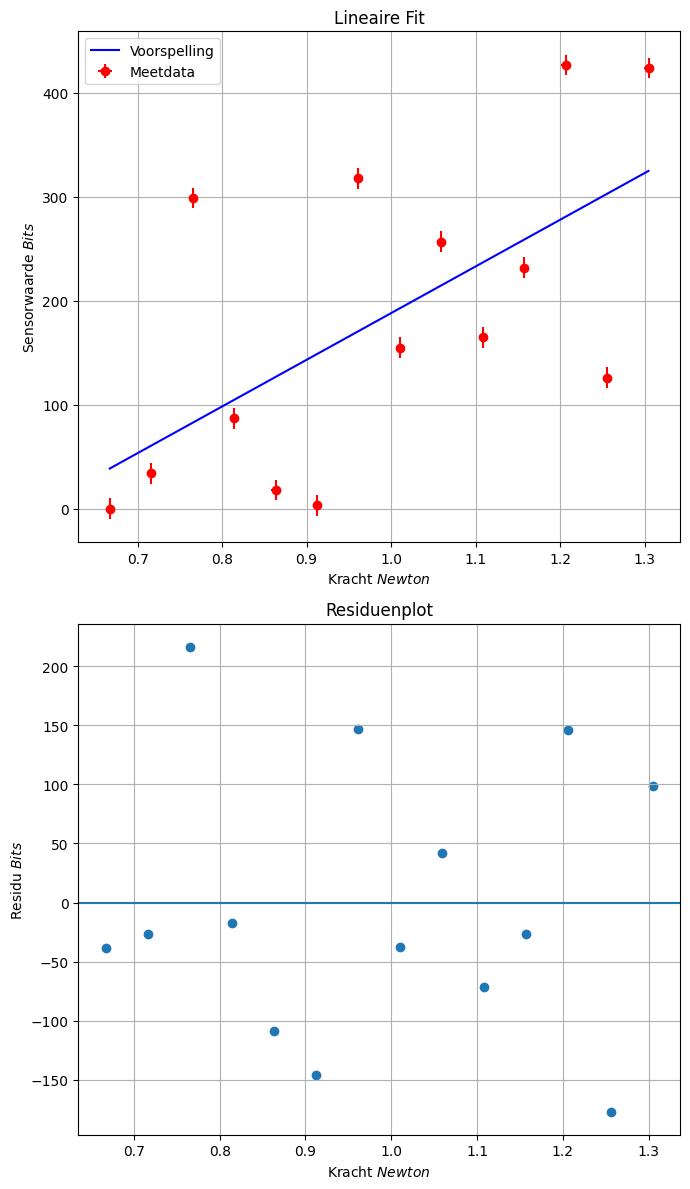

In [2]:
#Tweede opstelling van de code voor kalibreren en residuenplot:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. data
gram_data = np.array([68, 73, 78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133]) 
gram_error = 0.005  # Fout in massa meting
bits_data = np.array([0, 34, 299, 87, 18, 3, 318, 155, 257, 165, 232, 427, 126, 424])
bits_error = np.zeros(len(bits_data)) + 10


# 2. Omrekenen naar Newton
newton_data = (gram_data / 1000) * 9.81
newton_error_berekening = (0.5 / 1000) * 9.81  # Fout in kracht door fout in massa
newton_error = np.zeros(len(newton_data)) + newton_error_berekening

# 3. Lineair model
def lineair_model(x, a, b):
    return a * x + b

# 4. Curve fit
popt, pcov = curve_fit(lineair_model, newton_data, bits_data)
a_fit, b_fit = popt
error_a = np.sqrt(pcov[0,0])

# 5. Residuen berekenen
voorspeld = lineair_model(newton_data, *popt)
residuen = bits_data - voorspeld

# 6. Plotten
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 12))

# Bovenste grafiek: data + fit
ax1.errorbar(newton_data, bits_data, xerr=newton_error, yerr=bits_error, fmt='o', color='red', label='Meetdata')
x_range = np.linspace(min(newton_data), max(newton_data), 100)
ax1.plot(x_range, lineair_model(x_range, *popt), color='blue',label = 'Voorspelling')
ax1.set_title('Lineaire Fit')
ax1.set_xlabel('Kracht $Newton$ ')
ax1.set_ylabel('Sensorwaarde $Bits$')
ax1.legend()
ax1.grid(True)

# Onderste grafiek: residuen
ax2.scatter(newton_data, residuen)
ax2.axhline(0)
ax2.set_title('Residuenplot')
ax2.set_xlabel('Kracht $Newton$')
ax2.set_ylabel('Residu $Bits$')
ax2.grid(True)

plt.tight_layout()
plt.show()



## *Opdracht 7*: Iteratie nodig?

Tijdens het experiment bleek dat de eerste meetopstelling, waarbij met de hand op een krachtmeter werd gedrukt terwijl de druksensor werd uitgelezen, te onnauwkeurig en instabiel was om betrouwbare metingen te doen. De grafiek liet wel een globaal lineair verband zien, wat werd bevestigd door het random patroon in de residuenplot, maar de amplitude van de residuen was veel te groot. Hierdoor lag de fitlijn ver van de meetpunten en kon de nauwkeurigheidseis van ±0.05 N niet worden gehaald.
Daarnaast schommelde de kracht voortdurend rond de streepjes van de krachtmeter, waardoor niet gecontroleerd kon worden of stappen van 0.5 N een duidelijke verandering in sensorwaarde gaven. Alleen de meest stabiele meetpunten konden worden gebruikt, waardoor het onmogelijk was om binnen de gevraagde stapgrootte kleine krachtverschillen betrouwbaar te onderscheiden. Daarmee voldeed opstelling 1 niet aan de criteria voor nauwkeurigheid, resolutie en lineariteit.

Daarom werd de meetopstelling aangepast. In de tweede opstelling werd een bekertje op de druksensor geplaatst dat stap voor stap met nauwkeurig afgewogen hoeveelheden water werd gevuld. Hierdoor kon de kracht gecontroleerd en stabiel worden verhoogd binnen het gewenste bereik. De sensor reageerde wel op stappen van 0.5 N, en de fitlijn liet opnieuw een lineaire trend zien. Dit werd opnieuw bevestigd door een random residuenpatroon, wat betekent dat de relatie qua vorm lineair is.
Toch waren de residuen opnieuw groot. Hierdoor blijft de onnauwkeurigheid te groot om aan de nauwkeurigheids‑ en resolutiecriteria te voldoen, ondanks de verbeterde stabiliteit van de opstelling. Ook opstelling 2 voldeed daarom niet aan de gestelde criteria.


## *Opdracht 8*: Conclusie

De sensor kon het bereik tussen 0.7 en 1.15 wel meten en vertoonde een lineaire trend, maar de residuen waren groot en instabiel in beide opstellingen. Hierdoor werden de nauwkeurigheidseis van ±0.05 N en de resolutie van 0.5 N niet gehaald. De druksensor voldoet daarom niet aan de gestelde criteria.

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

![Alt](Circuitopbreadboard.jpeg "analyse: ideeen")


### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

## Smartopstellen:

| **Sensor + Toepassing**                    | **Criterium**        | **Eis**                                                                 |
|-------------------------------|-----------------------|-------------------------------------------------------------------------|
| **Thermistor – Brandmelder** | Bereik               | 50 °C – 100 °C                                                          |
|                               | Nauwkeurigheid        | ±0.5 °C                                                                 |
|                               | Meetfrequentie        | Minimaal elke 2 seconden een update                                    |
|                               | Resolutie             | Kan temperatuurveranderingen van 0.5 °C onderscheiden                  |
| **Hall-sensor – ABS Systeem** | Frequentiebereik      | Kan magnetisch veld meten bij rotaties tot 840 RPM                     |
|                               | Resolutie             | 0.005 T                                                                 |
|                               | Detectiecriterium     | Bij 14 constante rotaties binnen ±0.005 T → waarschuwing binnen 0.1 s  |
| **Druksensor – Toetsenbord**  | Bereik               | 0.7 N – 1.15 N N                                                           |
|                               | Nauwkeurigheid        | ±0.05 N                                                                 |
|                               | Resolutie             | Kan krachtveranderingen van 0.5 N onderscheiden                        |
|                               | Lineariteit           | Sensoruitgang moet binnen het krachtbereik een lineaire relatie vertonen tussen kracht (N) en bits |



## Ontwerpcyclus inrichten: 

# Meetopzet Druksensor

## 1. Variabele die wordt veranderd
We variëren de kracht die op de druksensor wordt uitgeoefend.  
Dit doen we door verschillende massa’s op de sensor te plaatsen.  
De kracht wordt berekend met:

F = m * g

waarbij g = 9.81 m/s**2

## 2. Bereik van de variabele
De kracht wordt gevarieerd van 0.70 N tot 1.15 N, overeenkomend met massa’s van ongeveer 70 g tot 115 g.

## 3. Wat wordt er gemeten?
Per meetpunt registreren we:

- Massa (kg)  
- Kracht (N), berekend via F = m*g  
- Uitgangswaarde van de druksensor (bits)  

## 4. Aantal metingen
We verhogen de kracht in stappen van 0.5 N binnen het gevraagde bereik, maar meten ook daarbuiten om te controleren of de sensor lineair blijft en niet verzadigt.

## 5. Evaluatie van geschiktheid
Met deze meetopzet kunnen we bepalen:

- of de sensor binnen het bereik reageert en variatie van waardes geeft binnen de gekozen stapgrootte  
- of de sensor lineair reageert binnen het krachtbereik  
- of de nauwkeurigheid voldoende is  

# Schets:

Op de foto is het elektrisch circuit met bijbehorende onderdeel waarmee we kracht gaan varieren getekent. Bij de eerste opstelling drukken we handmatig op een krachtmeter (veer), terwijl een vinger op de druksensor zit. Op deze manier proberen we de kracht te meten die op de sensor werkt.

![Alt](Ontwerp.jpeg "analyse: ideeen")


### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

# Opstelling: 

Op de foto is de fabricering van het elektrisch circuit aangesloten op de Arduino te zien.

![Alt](Circuitopbreadboard.jpeg "analyse: ideeen")

Op de fotos hieronder zijn twee verschillende meetopstellingen te zien.

In de eerste opstelling werd met de hand op een (veer)krachtmeter gedrukt terwijl een vinger op de druksensor rustte. De kracht die op de sensor werd uitgeoefend, werd zo afgelezen op de krachtmeter, terwijl de Arduino gelijktijdig de bits‑waarde registreerde

![Alt](krachtmeter.jpeg )

In de tweede opstelling werd een klein pootje op de druksensor geplaatst met daarop een leeg bekertje. Door het bekertje telkens met nauwkeurig afgewogen hoeveelheden water te vullen, werd de kracht op de sensor gecontroleerd en stap voor stap verhoogd binnen het gewenste bereik.

![Alt](wateropstelling.jpeg)



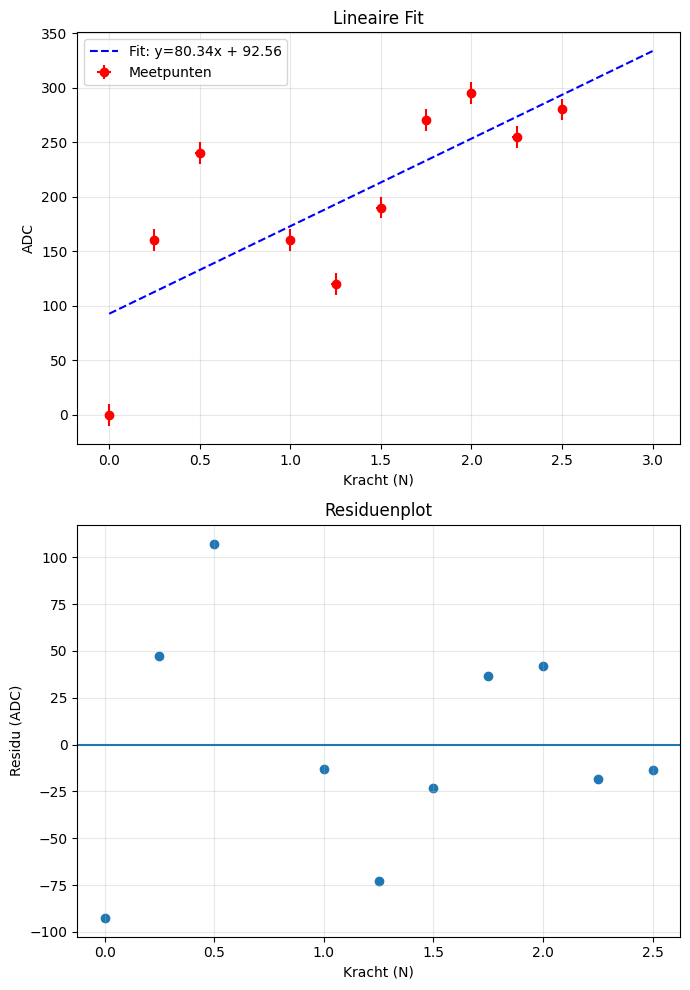

In [3]:
#Eerste opstelling van de code voor kalibreren en residuenplot: 

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1. Data invoeren
kracht_data = np.array([0, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) 
bits_data = np.array([0, 160, 240, 160, 120, 190, 270, 295, 255, 280]) 

bits_error = np.zeros(len(bits_data)) + 10
kracht_error = np.zeros(len(kracht_data)) + 0.025

# 2. Lineair model
def lineair_model(x, a, b):
    return a * x + b

# 3. Curve fit uitvoeren
popt, _ = curve_fit(lineair_model, kracht_data, bits_data)
a_fit, b_fit = popt

# 4. Voorspellingen en residuen
voorspeld = lineair_model(kracht_data, *popt)
residuen = bits_data - voorspeld

# 5. Plot maken
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))

# Bovenste grafiek: data + fit
ax1.errorbar(kracht_data, bits_data, xerr=kracht_error, yerr=bits_error, fmt = 'o', color='red', label='Meetpunten')
x_range = np.linspace(0, 3, 100)
ax1.plot(x_range, lineair_model(x_range, *popt), 'b--',label=f'Fit: y={a_fit:.2f}x + {b_fit:.2f}')
ax1.set_title('Lineaire Fit')
ax1.set_xlabel('Kracht (N)')
ax1.set_ylabel('ADC')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Onderste grafiek: residuen
ax2.scatter(kracht_data, residuen)
ax2.axhline(0)
ax2.set_title('Residuenplot')
ax2.set_xlabel('Kracht (N)')
ax2.set_ylabel('Residu (ADC)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


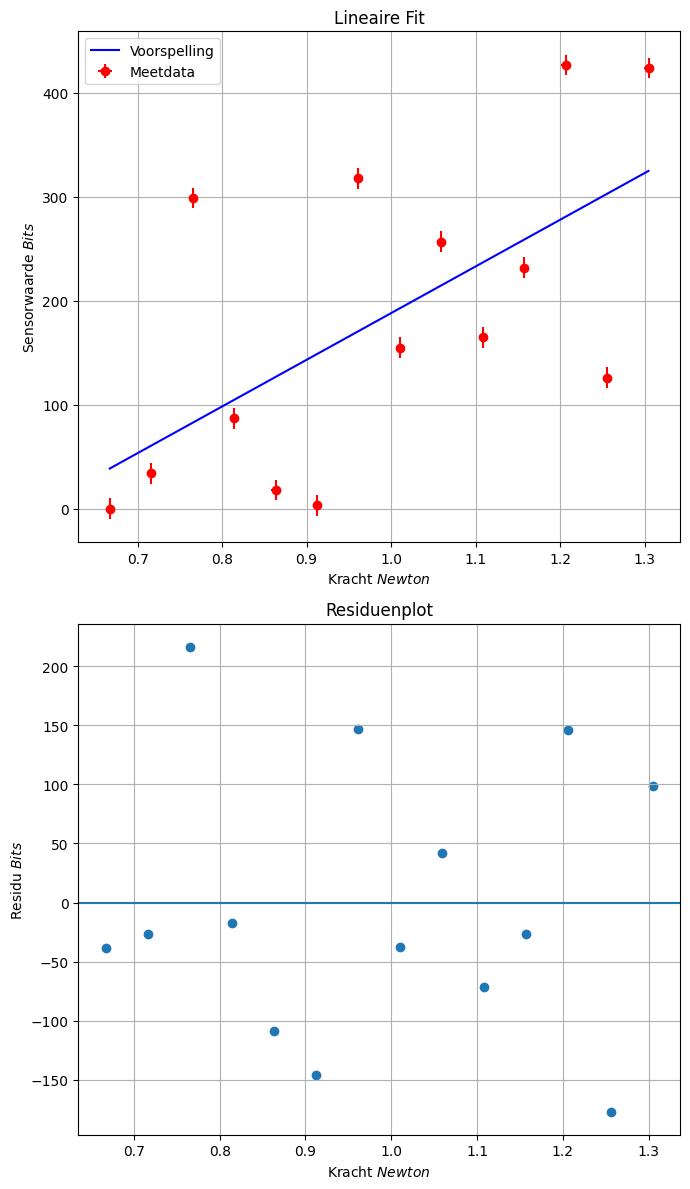

In [4]:
#Tweede opstelling van de code voor kalibreren en residuenplot:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. data
gram_data = np.array([68, 73, 78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133]) 
gram_error = 0.005  # Fout in massa meting
bits_data = np.array([0, 34, 299, 87, 18, 3, 318, 155, 257, 165, 232, 427, 126, 424])
bits_error = np.zeros(len(bits_data)) + 10


# 2. Omrekenen naar Newton
newton_data = (gram_data / 1000) * 9.81
newton_error_berekening = (0.5 / 1000) * 9.81  # Fout in kracht door fout in massa
newton_error = np.zeros(len(newton_data)) + newton_error_berekening

# 3. Lineair model
def lineair_model(x, a, b):
    return a * x + b

# 4. Curve fit
popt, pcov = curve_fit(lineair_model, newton_data, bits_data)
a_fit, b_fit = popt
error_a = np.sqrt(pcov[0,0])

# 5. Residuen berekenen
voorspeld = lineair_model(newton_data, *popt)
residuen = bits_data - voorspeld

# 6. Plotten
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 12))

# Bovenste grafiek: data + fit
ax1.errorbar(newton_data, bits_data, xerr=newton_error, yerr=bits_error, fmt='o', color='red', label='Meetdata')
x_range = np.linspace(min(newton_data), max(newton_data), 100)
ax1.plot(x_range, lineair_model(x_range, *popt), color='blue',label = 'Voorspelling')
ax1.set_title('Lineaire Fit')
ax1.set_xlabel('Kracht $Newton$ ')
ax1.set_ylabel('Sensorwaarde $Bits$')
ax1.legend()
ax1.grid(True)

# Onderste grafiek: residuen
ax2.scatter(newton_data, residuen)
ax2.axhline(0)
ax2.set_title('Residuenplot')
ax2.set_xlabel('Kracht $Newton$')
ax2.set_ylabel('Residu $Bits$')
ax2.grid(True)

plt.tight_layout()
plt.show()



## *Opdracht 8*: Conclusie

De sensor kon het bereik tussen 0.7 en 1.15 wel meten en vertoonde een lineaire trend, maar de residuen waren groot en instabiel in beide opstellingen. Hierdoor werden de nauwkeurigheidseis van ±0.05 N en de resolutie van 0.5 N niet gehaald. De druksensor voldoet daarom niet aan de gestelde criteria.